## Supervised learning assignment
- Name: Daan Steur
- Studentnumber: 379943
- Supervisor: Dr. Dave Langers
- Course: DSLS Data Science 3: Deep learning
- Date: 24th of june

# Title

## Assignment


## data source


In [7]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import opendatasets as od
import glob as glob
import cv2, os


### Data Download

In [2]:
# this command will automatically download the dataset in about 4 minutes
# requirments for this command: pip install opendatasets
od.download("https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download")



# if the command is not working, you can download the dataset manually
def create_dir(dir_name):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
# create_dir('rice-image-dataset')

# Data download link
download_link = "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download"

# after downloading the dataset, unzip it
# !unzip rice-image-dataset.zip


100%|██████████| 219M/219M [00:06<00:00, 37.5MB/s] 


### Exploration & preprocessing

In [2]:
# Separating the categories
# only selecting 1000 images per category to reduce the size of the dataset

data_dir = 'rice-image-dataset/Rice_Image_Dataset/'


arborio = glob.glob(f'{data_dir}Arborio/*.jpg')[:1000]
basmati = glob.glob(f'{data_dir}Basmati/*.jpg')[:1000]
ipsala = glob.glob(f'{data_dir}Ipsala/*.jpg')[:1000]
jasmine = glob.glob(f'{data_dir}Jasmine/*.jpg')[:1000]
karacadag = glob.glob(f'{data_dir}Karacadag/*.jpg')[:1000]

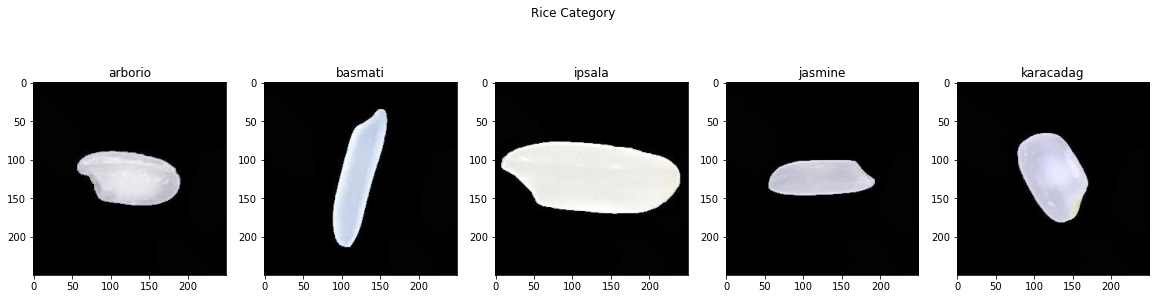

In [3]:
# Create a figure with all the rice categories
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)


In [4]:
# Assigning a separate dictionary for images and their corresponding labels
# Contains the images path
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [5]:
# Converting it into numerical arrays
img = cv2.imread(str(df_images['arborio'][0]))
img.shape # Its currently 250 by 250 by 3

x, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        x.append(resized_img) 
        y.append(df_labels[label])

# Standarizing
x = np.array(x)
x = x/255
y = np.array(y)

# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(x, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [16]:
print(f'X_train shape and dtype: {X_train.shape, X_train.dtype}')
print(f'y_train shape and dtype: {y_train.shape, y_train.dtype}\n')

print(f'X_test shape and dtype: {X_test.shape, X_test.dtype}')
print(f'y_test shape and dtype: {y_test.shape, y_test.dtype}\n')

print(f'X_val shape and dtype: {X_val.shape, X_val.dtype}')
print(f'y_val shape and dtype: {y_val.shape, y_val.dtype}')


X_train shape and dtype: ((3750, 224, 224, 3), dtype('float64'))
y_train shape and dtype: ((3750,), dtype('int32'))

X_test shape and dtype: ((937, 224, 224, 3), dtype('float64'))
y_test shape and dtype: ((937,), dtype('int32'))

X_val shape and dtype: ((313, 224, 224, 3), dtype('float64'))
y_val shape and dtype: ((313,), dtype('int32'))


### Baseline model

In [20]:
# sklearn create a Regression model for image classification
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit = model.fit(X_train, y_train)



ValueError: Found array with dim 4. Estimator expected <= 2.

Evalute the model

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

### Fully-connected neural network model

### Regularized convolutional neural network model